<h2> Exercise 10 - a little more about geometry and attributes </h2>

Lastly, we have loaded layers, selected features and accesed values of these features using vector and raster layer classes, project class and dataProvider method. To sum up, up to this day we have used:

Classes:

    QgsProject - project class

    QgsVectorLayer - vector layer class

    QgsRaterLayer - raster layer class
    
    QgsFeature - feature (object) of vector layer class
    
    QgsField - table column of attributes class (a column from attribute table - contains information about a type of data stored)

    QgsGeometry - feature geometry class
    
    QVariant - data type class
    
    iface - reference to the interface
    
The hierarchy of classes is: QgsProject can contain many QgsMapLayers (QgsVectorLayer and QgsRasterLayer). QgsVectorLayers can containt many QgsField and QgsFeature instances. QgsField consists of QVariant. QgsFeature consists of QgsGeometry, and can be build from geometry classes such as:

    QgsPoint, QgsPointXY,

    QgsPolygonXY

    QgsPolylineXY

dataProvider() enables access to data and properites of layer's features

Methods to create geometry:

    from coordinates:
        
        point = QgsGeometry.fromPointXY(QgsPointXY(1,1)) #difference between QgsPoint and QgsPointXY is that QgsPoint can be XYZ (so has also Z dimension)
        
        line = QgsGeometry.fromPolyline([QgsPoint(1,1), QgsPoint(2,2)])
        
        polygon = QgsGeometry.fromPolygonXY([[QgsPointXY(1,1),QgsPointXY(2,2), QgsPointXY(2,1)]])
    
    From WKT:

        gem = QgsGeometry.fromWkt("POINT(3 4)")

    From WKB (won't be using that):

        wkb = bytes.fromhex("010100000000000000000045400000000000001440") g.fromWkb(wkb)
        


These methods were not covered but will come in handy in the future. They conver QgsGeometry into one of the geometry classes such as QgsPoint etc.

    geometry.asPoint()
    
    geometry.asMultiPoint()
    
    geometry.asPolyline()
    
    geometry.asMultiPolyline()
    
    geometry.asPolygon()
    
    geometry.asMultiPolygon()
    
    geometry.asWkt()
    
    geometry.asWkb()
    
Where geometry is some instance of QgsGeometry class
    

Let's practice it. I'm loading a Budynki_JG.shp layer (attached). Below I present results, so you can test it and compare by yourself.

First I open a Python editor window:

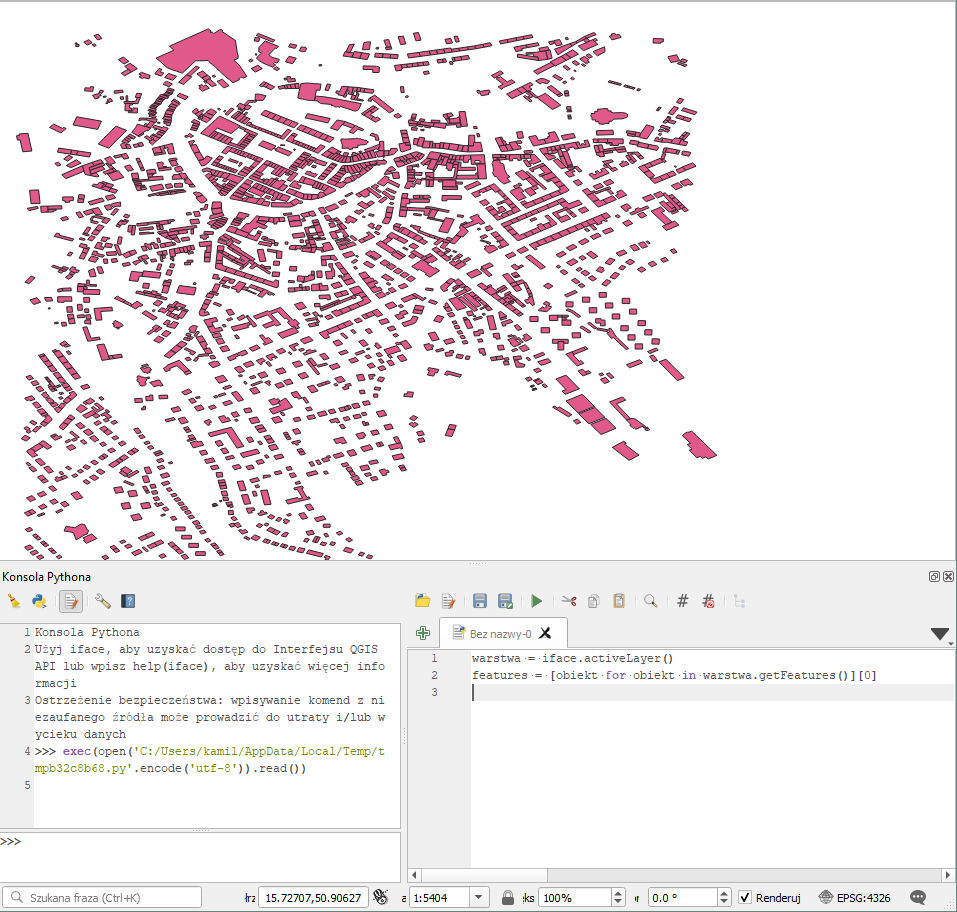

In [1]:
from IPython.display import Image #to open pictures in this notebook
Image('1.png')

Let's select the first (one) object (feature) from layer:

In [ ]:
warstwa = iface.activeLayer() #read current layer
features = [obiekt for obiekt in warstwa.getFeatures()] #get list of features
first_object = features[0] #get only the first object


Let's read its geometry:

In [ ]:
geom = first_object.geometry()

print(geom) results in:

<QgsGeometry: MultiPolygon (((15.7402792999999992 50.9030161000000021, 15.74068950000000022 50.90302559999999943, 15.74071329999999946 50.90275609999999773, 15.74046760000000056 50.90274749999999671, 15.74030860000000054 50.90274089999999774, 15.7402792999999992 50.9030161000000021),(15.74040630000000007 50.90285010000000199, 15.74041360000000012 50.90277679999999805, 15.74056419999999967 50.90278289999999828, 15.74055689999999963 50.90285620000000222, 15.74040630000000007 50.90285010000000199)))>

Which is an output defined by the __str__ method of QgsGeometry class.

Now, we can try to convert the geometry:

In [ ]:
print(geom.asMultiPolygon())

We had to use convert to MultiPolygon, that is our input geometry. The result:

[[[<QgsPointXY: POINT(15.7402792999999992 50.9030161000000021)>, <QgsPointXY: POINT(15.74068950000000022 50.90302559999999943)>, <QgsPointXY: POINT(15.74071329999999946 50.90275609999999773)>, <QgsPointXY: POINT(15.74046760000000056 50.90274749999999671)>, <QgsPointXY: POINT(15.74030860000000054 50.90274089999999774)>, <QgsPointXY: POINT(15.7402792999999992 50.9030161000000021)>], [<QgsPointXY: POINT(15.74040630000000007 50.90285010000000199)>, <QgsPointXY: POINT(15.74041360000000012 50.90277679999999805)>, <QgsPointXY: POINT(15.74056419999999967 50.90278289999999828)>, <QgsPointXY: POINT(15.74055689999999963 50.90285620000000222)>, <QgsPointXY: POINT(15.74040630000000007 50.90285010000000199)>]]]

So we got a list of QgsPointXY instance. What can we do with it? Of course we can edit geometry <b> point by point </b>. 

As you can seen the list is triple nested:

Level 1 - because MultiPolygon - can store MANY polygons;
Level 2 - because allows geometry to have "holes";
Level 3 - Stores a geometry (outer geometry of polygon)

On a level 1 we have only one object (so in fact it can be a simple Polygon, but this is how QGIS loaded the layer) - that means we have only one polygon. On a level 2 we have two lists. That means that we have a geometry with a "hole" in it. 

This is how it looks:

(I have selected it using warstwa.selectByIds([first_object.id()]) - then it highlights on the map)

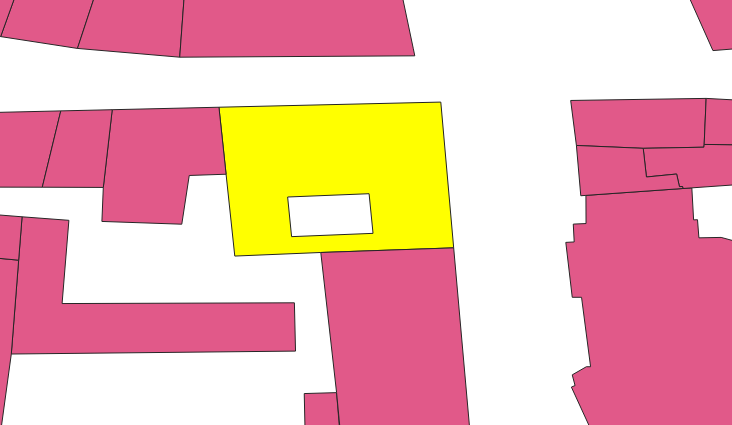

In [8]:
Image('2.png')

To acces a vertex of a polygon we need to use indecies. For example the first vertex of a polygon's hole is:

In [ ]:
print(geom.asMultiPolygon()[0][1][0])

Let's convert geometry to WKT:

In [ ]:
print(geom.asWkt())

MultiPolygon (((15.7402792999999992 50.9030161000000021, 15.74068950000000022 50.90302559999999943, 15.74071329999999946 50.90275609999999773, 15.74046760000000056 50.90274749999999671, 15.74030860000000054 50.90274089999999774, 15.7402792999999992 50.9030161000000021),(15.74040630000000007 50.90285010000000199, 15.74041360000000012 50.90277679999999805, 15.74056419999999967 50.90278289999999828, 15.74055689999999963 50.90285620000000222, 15.74040630000000007 50.90285010000000199)))

WKB is not very informative:

In [ ]:
print(geom.asWkb())

b'\x01\x06\x00\x00\x00\x01\x00\x00\x00\x01\x03\x00\x00\x00\x02\x00\x00\x00\x06\x00\x00\x00\xc1\xcfn\xe3\x05{/@x\xa1\x14\x08\x96sI@/\xfbu\xa7;{/@\xb3\xb9\xc5W\x96sI@\xaal\x0e\xc6>{/@\xdb\xe1\n\x83\x8dsI@\xc7~\xbb\x91\x1e{/@\xdb\x85\xe6:\x8dsI@%\xe5\x93\xba\t{/@|!\x89\x03\x8dsI@\xc1\xcfn\xe3\x05{/@x\xa1\x14\x08\x96sI@\x05\x00\x00\x006\x81\xd8\x88\x16{/@]X\x92\x97\x90sI@\xfa\x06\xcb}\x17{/@4\xcb\xaf0\x8esI@C-\x17;+{/@\xabq\xdbc\x8esI@\x7f\xa7$F*{/@\xd4\xfe\xbd\xca\x90sI@6\x81\xd8\x88\x16{/@]X\x92\x97\x90sI@'

Ok, so why should I use these conversion methods?

In this way we can easily copy and modify the geometry of QGIS objects.
Let's see this on an example (comments are describing the process):

In [ ]:
layer = iface.activeLayer() #currently selected layer
features = [obj for obj in layer.getFeatures()] #iteration through layer's features
first_feature = features[0] #first object

geom = first_feature.geometry() #accessing geometry
new_geom= [] #preparing a list for a new geometry
new_hole = []

for obj in geom.asMultiPolygon(): #iteration through points of a geometry (converted by asMultiPolygon method)
    new_geom.append(obj[0]) #we copy the outer geometry to the new_geom list
    for vertex in obj[1]: #Iteration through the vertices of a "hole"
        vertex.setX(vertex.x()+.1) #we move the X coordinate by .1 (in degrees) -
        new_hole.append(vertex) #we add chagned point to the new list

new_geom.append(new_hole) #We add modified "hole" to the new_geom list
new_geom = QgsGeometry.fromPolygonXY(new_geom) #and use that list to create QgsGeometry class

layer.dataProvider().changeGeometryValues({0: new_geom}) #we change the geometry of the object via dataProvider method

As a result we have changed the "hole" geometry. In fact, we have moved it so far that it just vanished :)

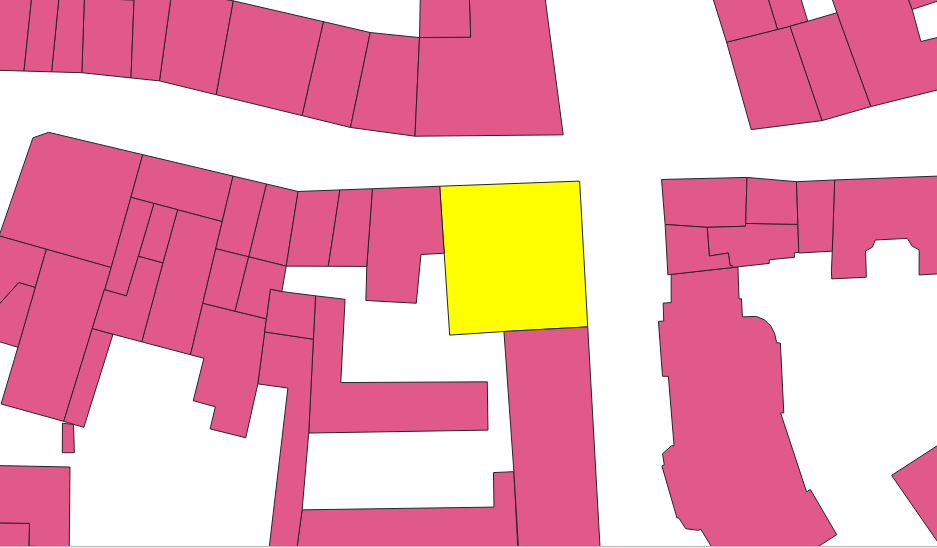

In [10]:
Image('3.png')

<h3> Checking geometry type </h3>

For that we can use a wkbType() method applied on QgsGeometry instance. As a result a number is returned, the number corresponds to the geometry type defined in the documentation under QgsWkbTypes enumeration. For our object:

In [ ]:
print(geom.wkbType())

Returns: 6

If we check documentation we can see that 6 = MultiPolygon


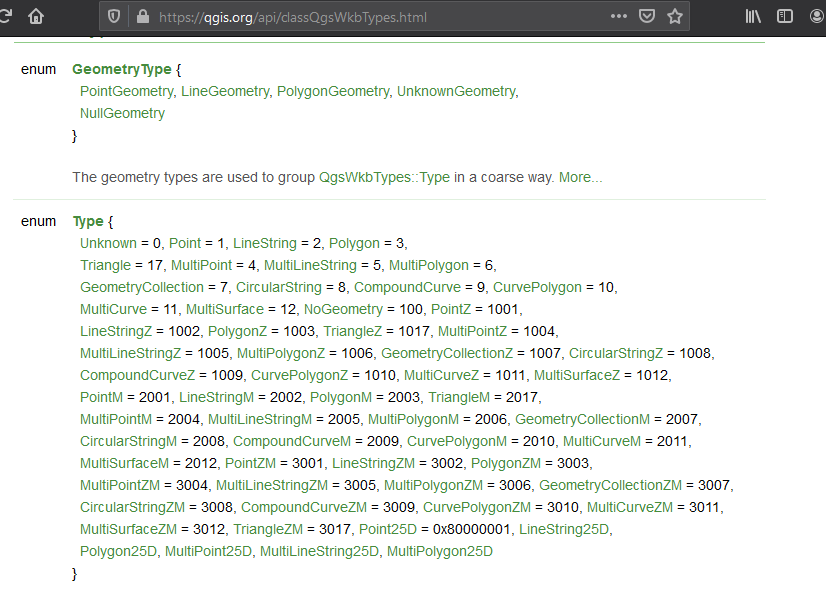

In [11]:
Image('4.png')

But checking numbers is boring. We can access QgsWkbType enumeration to check geometries:

    geom.wkbType() == QgsWkbTypes.Point

    geom.wkbType() == QgsWkbTypes.LineString

    geom.wkbType() == QgsWkbTypes.Polygon

    geom.wkbType() == QgsWkbTypes.MultiPolygon

Returns:

    False

    False

    False

    True

QgsWkbTypes.MultiPolygon returns "6" - simple as that

<b> That's all for today! <b>